In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genre,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4,2000-07-30 18:45:03
1,2,Jumanji,Adventure|Children|Fantasy,1995,436,4,1996-05-31 08:02:31
2,3,Grumpier Old Men,Comedy|Romance,1995,448,3,2002-04-18 11:15:36
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,262,1,1996-08-17 18:23:23
4,5,Father of the Bride Part II,Comedy,1995,353,3,1996-05-12 22:25:14


In [34]:
movie_id = movies['movieId'].tolist()
movie_title = movies['title'].tolist()
movie_genre = movies['genre'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

9359
9359
9359


In [35]:
df_movies = pd.DataFrame({
    'id': movie_id,
    'judul': movie_title,
    'genre': movie_genre
})
df_movies

,id,judul,genre
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy
...,...,...,...
9354,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy
9355,193583,No Game No Life: Zero,Animation|Comedy|Fantasy
9356,193585,Flint,Drama
9357,193587,Bungo Stray Dogs: Dead Apple,Action|Animation


### Content Based Filtering (*Count Vectorizer* & *Cosine Similarity*)

In [36]:
count_vectorizer = CountVectorizer()
genre_matrix = count_vectorizer.fit_transform(df_movies['genre'])
feature_names = count_vectorizer.get_feature_names_out()

count_matrix_df = pd.DataFrame(
    genre_matrix.toarray(),
    columns=feature_names,
    index=df_movies['judul']
)
count_matrix_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film,horror,imax,musical,mystery,noir,romance,scifi,thriller,war,western
judul,,,,,,,,,,,,,,,,,,,,
Toy Story,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Jumanji,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Waiting to Exhale,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
Father of the Bride Part II,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
No Game No Life: Zero,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Flint,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
similarity_matrix = cosine_similarity(genre_matrix, genre_matrix)
similarity_matrix

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [38]:
def recommend_movies(movie_title, similarity_matrix, df_movies):

    movie_index = df_movies[df_movies['judul'] == movie_title].index[0]

    sim_scores = list(enumerate(similarity_matrix[movie_index]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    recommended_movies = df_movies[['judul', 'genre']].iloc[movie_indices]

    return recommended_movies

In [39]:
movie_title_to_recommend = "Toy Story"
recommended_movies = recommend_movies(movie_title_to_recommend, similarity_matrix, df_movies)
recommended_movies

,judul,genre
1695,Antz,Adventure|Animation|Children|Comedy|Fantasy
2322,Toy Story 2,Adventure|Animation|Children|Comedy|Fantasy
2769,"Adventures of Rocky and Bullwinkle, The",Adventure|Animation|Children|Comedy|Fantasy
2958,"Emperor's New Groove, The",Adventure|Animation|Children|Comedy|Fantasy
3519,"Monsters, Inc.",Adventure|Animation|Children|Comedy|Fantasy
6018,"Wild, The",Adventure|Animation|Children|Comedy|Fantasy
6294,Shrek the Third,Adventure|Animation|Children|Comedy|Fantasy
6737,"Tale of Despereaux, The",Adventure|Animation|Children|Comedy|Fantasy
7502,Asterix and the Vikings,Adventure|Animation|Children|Comedy|Fantasy
7939,Turbo,Adventure|Animation|Children|Comedy|Fantasy


### Collaborative Filtering

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [41]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genre,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4,2000-07-30 18:45:03
1,2,Jumanji,Adventure|Children|Fantasy,1995,436,4,1996-05-31 08:02:31
2,3,Grumpier Old Men,Comedy|Romance,1995,448,3,2002-04-18 11:15:36
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,262,1,1996-08-17 18:23:23
4,5,Father of the Bride Part II,Comedy,1995,353,3,1996-05-12 22:25:14


In [10]:
df = movies[['userId', 'movieId', 'rating']]
df.head()

,userId,movieId,rating
0,1,1,4
1,436,2,4
2,448,3,3
3,262,4,1
4,353,5,3


In [11]:
user_ids = df['userId'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [12]:
movie_ids = df['movieId'].unique().tolist()
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [13]:
df_copy = df.copy()
df_copy['user'] = df_copy['userId'].map(user_to_user_encoded)
df_copy['movie'] = df_copy['movieId'].map(movie_to_movie_encoded)

In [14]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df_copy['rating'] = df_copy['rating'].values.astype(np.float32)
min_rating = min(df_copy['rating'])
max_rating = max(df_copy['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

459
9359
Number of User: 459, Number of Movie: 9359, Min Rating: 1.0, Max Rating: 5.0


In [15]:
df_copy = df_copy.sample(frac=1, random_state=42)
df_copy

,userId,movieId,rating,user,movie
6554,610,59727,5.0,77,6554
6595,553,60753,4.0,260,6595
7071,522,76060,5.0,397,7071
4749,414,7248,4.0,9,4749
582,202,715,4.0,38,582
...,...,...,...,...,...
5734,187,33421,4.0,295,5734
5191,232,8830,2.0,346,5191
5390,380,26585,4.0,75,5390
860,555,1135,3.0,160,860


In [16]:
x = df_copy[['user', 'movie']].values

y = df_copy['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df_copy.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  77 6554]
 [ 260 6595]
 [ 397 7071]
 ...
 [  75 5390]
 [ 160  860]
 [  16 7270]] [1.   0.75 1.   ... 0.75 0.5  0.75]


In [17]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movie, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movie = num_movie
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.movie_embedding = layers.Embedding(
            num_movie,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movie, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])

        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x)

In [18]:
model = RecommenderNet(num_users, num_movie, embedding_size=50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [19]:
early_stopping_callback = EarlyStopping(
    patience=5,
    restore_best_weights=True,
    monitor='val_root_mean_squared_error',
    mode='min'
)

In [20]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_callback]
)


Epoch 1/100
234/234 [==============================] - 3s 9ms/step - loss: 0.6882 - root_mean_squared_error: 0.2886 - val_loss: 0.6818 - val_root_mean_squared_error: 0.2931
Epoch 2/100
234/234 [==============================] - 2s 8ms/step - loss: 0.6574 - root_mean_squared_error: 0.2613 - val_loss: 0.6772 - val_root_mean_squared_error: 0.2891
Epoch 3/100
234/234 [==============================] - 3s 11ms/step - loss: 0.6456 - root_mean_squared_error: 0.2503 - val_loss: 0.6727 - val_root_mean_squared_error: 0.2853
Epoch 4/100
234/234 [==============================] - 2s 7ms/step - loss: 0.6386 - root_mean_squared_error: 0.2438 - val_loss: 0.6697 - val_root_mean_squared_error: 0.2826
Epoch 5/100
234/234 [==============================] - 2s 8ms/step - loss: 0.6327 - root_mean_squared_error: 0.2379 - val_loss: 0.6669 - val_root_mean_squared_error: 0.2802
Epoch 6/100
234/234 [==============================] - 2s 8ms/step - loss: 0.6281 - root_mean_squared_error: 0.2335 - val_loss: 0.6649

In [21]:
test_loss, test_rmse = model.evaluate(x, y)
val_loss, val_rmse = model.evaluate(x_val, y_val)

print(f'Test Loss: {test_loss}, Test RMSE: {test_rmse}')
print(f'Validation Loss: {val_loss}, Validation RMSE: {val_rmse}')

59/59 [==============================] - 0s 2ms/step - loss: 0.6448 - root_mean_squared_error: 0.2611
Test Loss: 0.5435070395469666, Test RMSE: 0.14389628171920776
Validation Loss: 0.6448099613189697, Validation RMSE: 0.2610991299152374


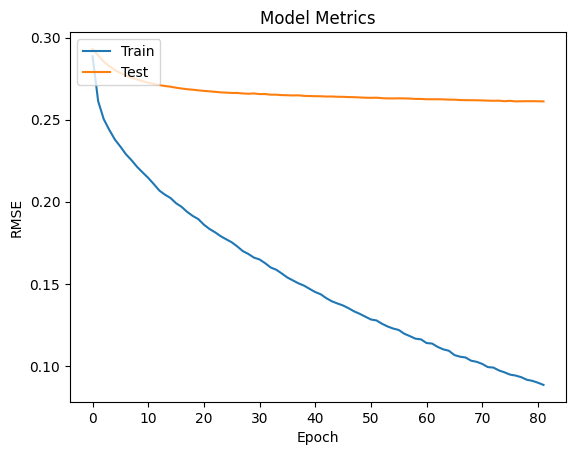

In [22]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('recommendation_model', save_format='tf')

In [ ]:
import shutil
from google.colab import files

folder_path = '/content/recommendation_model'
zip_path = '/content/recommendation_model'

shutil.make_archive(zip_path, 'zip', folder_path)

'/content/recommendation_model.zip'

### Get Movie Recommendations

In [29]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genre,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4,2000-07-30 18:45:03
1,2,Jumanji,Adventure|Children|Fantasy,1995,436,4,1996-05-31 08:02:31
2,3,Grumpier Old Men,Comedy|Romance,1995,448,3,2002-04-18 11:15:36
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,262,1,1996-08-17 18:23:23
4,5,Father of the Bride Part II,Comedy,1995,353,3,1996-05-12 22:25:14


In [30]:
user_id = movies.userId.sample(1).iloc[0]
movie_visited_by_user = movies[movies.userId == user_id]

movie_not_visited = movies[~movies['movieId'].isin(movie_visited_by_user.movieId.values)]['movieId']
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [31]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Menampilkan Rekomendasi untuk Pengguna: {}'.format(user_id))
print('===' * 9)
print('Film dengan Rating Tinggi dari Pengguna')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_rows = movies[movies['movieId'].isin(top_movie_user)]
for row in movie_rows.itertuples():
    print(row.title, ':', row.genre)

print('----' * 8)
print('10 Rekomendasi Film Teratas')
print('----' * 8)

recommended_movie = movies[movies['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

285/285 [==============================] - 0s 1ms/step
Menampilkan Rekomendasi untuk Pengguna: 89
Film dengan Rating Tinggi dari Pengguna
--------------------------------
Girls About Town : Comedy
Runaway Brain : Animation|Comedy|Scifi
Fantastic Fear of Everything, A : Comedy
Cornered! : Comedy|Horror
The Editor : Comedy|Horror|Mystery
--------------------------------
10 Rekomendasi Film Teratas
--------------------------------
His Girl Friday : Comedy|Romance
Star Wars: Episode II - Attack of the Clones : Action|Adventure|Scifi|IMAX
High and Low : Crime|Drama|Film-Noir|Thriller
King Arthur : Action|Adventure|Drama|War
Steamboat Bill, Jr. : Comedy|Romance
Chorus, The : Drama
Elite Squad: The Enemy Within : Action|Crime|Drama
Trailer Park Boys : Comedy|Crime
Untitled Spider-Man Reboot : Action|Adventure|Fantasy
Baby Driver : Action|Crime|Thriller
